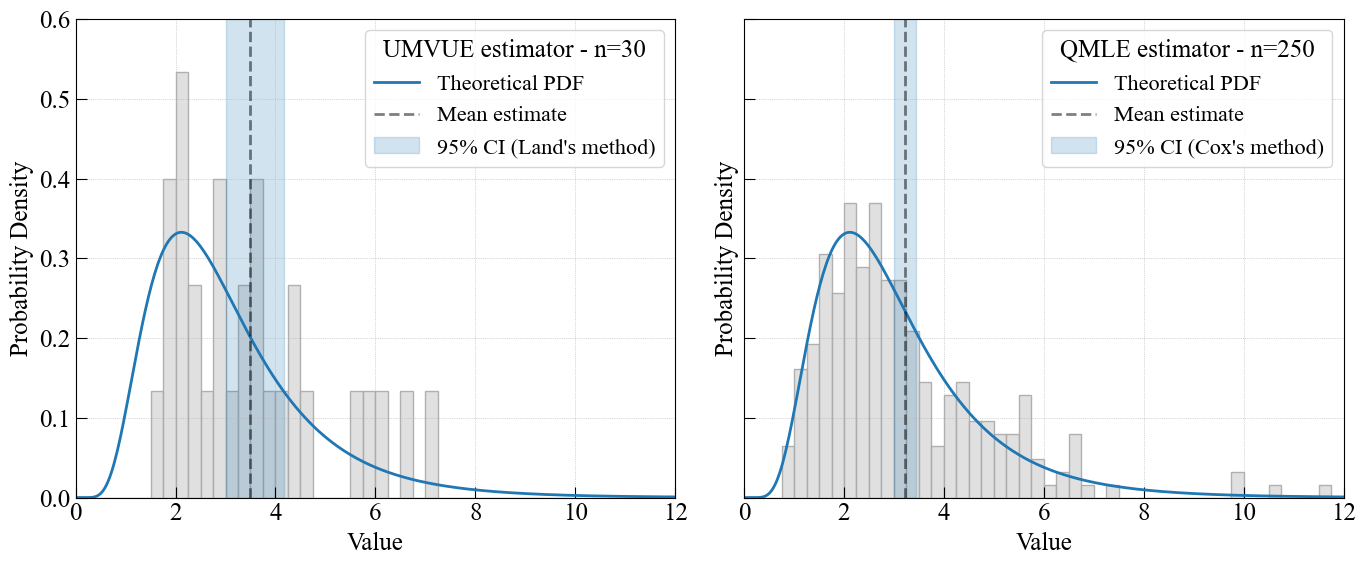

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import pyco2stats as PyCO2

# 1) Fix random state
rng = np.random.RandomState(32)

# 2) Parameters
mu = 1
sigma = 0.5
n1 = 30
n2 = 250
# 3) Draw sample
sample1 = rng.lognormal(mean=mu, sigma=sigma, size=n1)
sample2 = rng.lognormal(mean=mu, sigma=sigma, size=n2)

# 4) Compute PDF at each sample point
#    Note: scipy’s lognorm takes `s = sigma` and `scale = exp(mu)`
x = np.linspace(-0.5, 15, 500)
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))

result1 = PyCO2.Stats.lognormal_estimator(
                    sample1,
                    method='umvue',
                    ci=True,
                    ci_type='two-sided',
                    ci_method='land',
                    conf_level=0.95
                )

result2 = PyCO2.Stats.lognormal_estimator(
                    sample2,
                    method='qmle',
                    ci=True,
                    ci_type='two-sided',
                    ci_method='cox',
                    conf_level=0.95
                )


import matplotlib.pyplot as plt
# Global style
plt.style.use('default')
plt.rcParams.update({
    'font.size': 18,
    'font.family'   : 'Times New Roman',
    'axes.labelsize': 18,
    'legend.fontsize': 16,
    'xtick.direction':  'in',
    'ytick.direction':  'in',
    'xtick.major.size': 8,
    'ytick.major.size': 8,
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), sharey=True)

bins = np.arange(0, 12.5, 0.25)

def format_ax(ax, sample, result, title, n, ci_method):
    # Histogram
    ax.hist(sample, bins=bins, density=True,
            color='#dddddd', edgecolor='darkgray', linewidth=1, alpha=0.9)
    # PDF line
    ax.plot(x, pdf, label='Theoretical PDF',
            lw=2, color='#1f77b4')
    # Mean estimate
    ax.axvline(result['mean_estimate'], label='Mean estimate',
               linestyle='--', lw=2, color='black', alpha=0.5)
    # CI band
    ax.axvspan(result['LCL'], result['UCL'], label='95% CI (' + ci_method +')',
               color='#1f77b4', alpha=0.2)
    # Labels & limits
    ax.set_xlabel('Value')
    ax.set_ylabel('Probability Density')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 0.6)
    ax.grid(True, linestyle=':', linewidth=0.5)
    ax.legend(loc='upper right', title=title + ' - n=' + str(n))

format_ax(ax1, sample1, result1, 'UMVUE estimator', n1, 'Land\'s method')
format_ax(ax2, sample2, result2, 'QMLE estimator', n2, 'Cox\'s method')



fig.tight_layout()
plt.savefig("Stats.png", dpi=300)